In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.dpi'] = 100

In [2]:
num_pts = 1000
np.random.seed(42)
xs = np.random.random((num_pts,))
noise_level = 0.3
es = np.random.random(num_pts)*noise_level
m = 2.71828
b = 3.1415
ys = m*xs + b + es

Text(0.5, 1.0, 'Synthetic Linear Data')

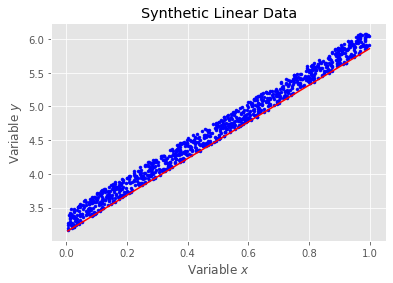

In [3]:
fig, ax = plt.subplots()
ax.scatter(xs, ys, color='b',marker='.')
ax.plot([xs.min(),xs.max()], [m*xs.min()+b, m*xs.max()+b], 'r-')
ax.set_xlabel('Variable $x$')
ax.set_ylabel('Variable $y$')
ax.set_title('Synthetic Linear Data')

In [4]:
X = np.vstack([xs, np.ones(len(xs))]).T
X.shape

(1000, 2)

In [5]:
Y = ys.reshape((len(ys), 1))
Y.shape

(1000, 1)

In [6]:
Chat = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

In [7]:
print('m =',Chat[0], 'b =', Chat[1])

m = [2.72707447] b = [3.28779364]


In [8]:
yshat = np.dot(X, Chat)
yshat.shape

(1000, 1)

In [9]:
rmse = np.sqrt(((Y-yshat)**2).sum()*(1/num_pts))

In [10]:
rmse

0.08757548823586253

In [11]:
(Y-yshat).mean()

1.3709033908071434e-15

## Numpy Linear Regression

In [13]:
m_numpy, b_numpy = np.linalg.lstsq(X,Y,rcond=None)[0]
print('m = {}, b = {}'.format(m_numpy, b_numpy))

m = [2.72707447], b = [3.28779364]


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(xs.reshape(len(xs),1), ys)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('m = {}, b = {}'.format(reg.coef_[0],reg.intercept_))

m = 2.7270744737018653, b = 3.28779364318842


In [19]:
yhat_sk = reg.predict(xs.reshape(len(xs),1))

In [22]:
rmse_sk = np.sqrt(((Y-yhat_sk.reshape(Y.shape))**2).sum()*(1/num_pts))
rmse_sk

0.08757548823586254

In [23]:
yhat_sk.max(),yhat_sk.min(),yshat.max(),yshat.min()

(6.014098190915648, 3.3004255148858723, 6.014098190915641, 3.3004255148858763)

## With StatsModels

In [24]:
import statsmodels.api as sm

In [26]:
model = sm.OLS(ys, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 8.251e+04
Date:                Wed, 23 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:44:25   Log-Likelihood:                 1016.3
No. Observations:                1000   AIC:                            -2029.
Df Residuals:                     998   BIC:                            -2019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7271      0.009    287.243      0.0

In [29]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston

In [30]:
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

AttributeError: 'function' object has no attribute 'data'

In [31]:
lm = LinearRegression()

In [ ]:
lm.fit(bos.iloc[:,:,-1],bos['PRICE'])